In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from keras_tuner import RandomSearch

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
dow_jones_index = fetch_ucirepo(id=312)

# data (as pandas dataframes)
X = dow_jones_index.data.features
y = dow_jones_index.data.targets

# Assuming you have X and y defined from the previous code snippet
# Combine X and y into a single DataFrame
df = pd.concat([X, y], axis=1)

# Drop the 'stock' and 'quarter' columns if they exist
if 'stock' in df.columns:
  df = df.drop('stock', axis=1)

if 'quarter' in df.columns:
  df = df.drop('quarter', axis=1)

# Print the updated DataFrame
df.head()

,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
0,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,26,0.182704,-4.428490
1,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
3,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
4,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814


In [ ]:
from ucimlrepo import fetch_ucirepo

# Fill missing values with 0
df['percent_change_volume_over_last_wk'] = df['percent_change_volume_over_last_wk'].fillna(0)
df['previous_weeks_volume'] = df['previous_weeks_volume'].fillna(0)

# Check for null values in the DataFrame
null_counts = df.isnull().sum()

# Print the number of null values for each column
print(null_counts)

# You can also get a boolean mask for the entire DataFrame
# to see where null values are present
null_values = df.isnull()
null_values

# prompt: Excluir valores zerados do dataset

# Remove rows where any column has a value of 0
df = df[~(df == 0).any(axis=1)]

# prompt: Substituir o $ da coluna Open para vazio

# Replace '$' with an empty string in the 'Open' column
df['open'] = df['open'].str.replace('$', '', regex=False)
df['high'] = df['high'].str.replace('$', '', regex=False)
df['low'] = df['low'].str.replace('$', '', regex=False)
df['close'] = df['close'].str.replace('$', '', regex=False)

# Print the updated DataFrame
df.head()


date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
days_to_next_dividend                 0
percent_return_next_dividend          0
percent_change_next_weeks_price       0
dtype: int64


<ipython-input-6-46b32c39ef1f>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['open'] = df['open'].str.replace('$', '', regex=False)
<ipython-input-6-46b32c39ef1f>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high'] = df['high'].str.replace('$', '', regex=False)
<ipython-input-6-46b32c39ef1f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
1,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,$16.19,$15.79,19,0.187852,-2.470660
2,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,$15.87,$16.13,12,0.189994,1.638310
3,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,$16.18,$17.14,5,0.185989,5.933250
4,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,$17.33,$17.37,97,0.175029,0.230814
5,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,$17.39,$17.28,90,0.172712,-0.632547


In [ ]:
# 1. Carregar os dados
data = df  # Substitua pelo seu arquivo com os dados do Dow Jones
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

close_prices = data['close'].values
close_prices = close_prices.reshape(-1, 1)



In [ ]:
# 2. Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [ ]:
# 3. Criar dados para o modelo
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i + time_step, 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir em treino e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# 4. Definir função de construção do modelo
def build_model(hp):
    model = Sequential()
    model.add(
        LSTM(
            units=hp.Int('units', min_value=32, max_value=128, step=32),
            return_sequences=True,
            input_shape=(X_train.shape[1], X_train.shape[2])
        )
    )
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=128, step=32), return_sequences=False))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('dense_units', min_value=16, max_value=64, step=16)))
    model.add(Dense(1))  # Saída única para regressão
    model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
                  loss='mean_squared_error')
    return model

In [ ]:
# 5. Configurar Keras Tuner
from keras_tuner import Hyperband

tuner = Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=100,
    factor=3,
    directory='my_dir',
    project_name='dow_jones_lstm'
)


In [ ]:
# 6. Procurar os melhores hiperparâmetros
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Trial 254 Complete [00h 00m 22s]
val_loss: 0.0032315088901668787

Best val_loss So Far: 0.003022216260433197
Total elapsed time: 00h 25m 37s


In [ ]:
# 7. Obter os melhores hiperparâmetros e treinar o modelo final
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Melhores Hiperparâmetros: {best_hps.values}")

Melhores Hiperparâmetros: {'units': 128, 'dropout': 0.1, 'units_2': 96, 'dropout_2': 0.1, 'dense_units': 16, 'optimizer': 'adam', 'tuner/epochs': 100, 'tuner/initial_epoch': 34, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0204'}


In [ ]:
# Recriar o modelo com os melhores hiperparâmetros
best_model = tuner.hypermodel.build(best_hps)
best_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 96)                  │          86,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 154,529 (603.63 KB)

 Trainable params: 154,529 (603.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Treinar o modelo
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, batch_size=32, verbose=1)


Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0045 - val_loss: 0.0050
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0037 - val_loss: 0.0049
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0033 - val_loss: 0.0149
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - val_loss: 0.0071
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - val_loss: 0.0053
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - val_loss: 0.0067
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - val_loss: 0.0047
Epoch 9/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0054
Epoch 10/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0038 - val_loss: 0.0089
Epoch 11/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0051 - val_loss: 0.0092
Epoch 12/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0

In [ ]:
# 8. Prever e avaliar
train_predict = best_model.predict(X_train)
test_predict = best_model.predict(X_test)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [ ]:
# Reverter a escala
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

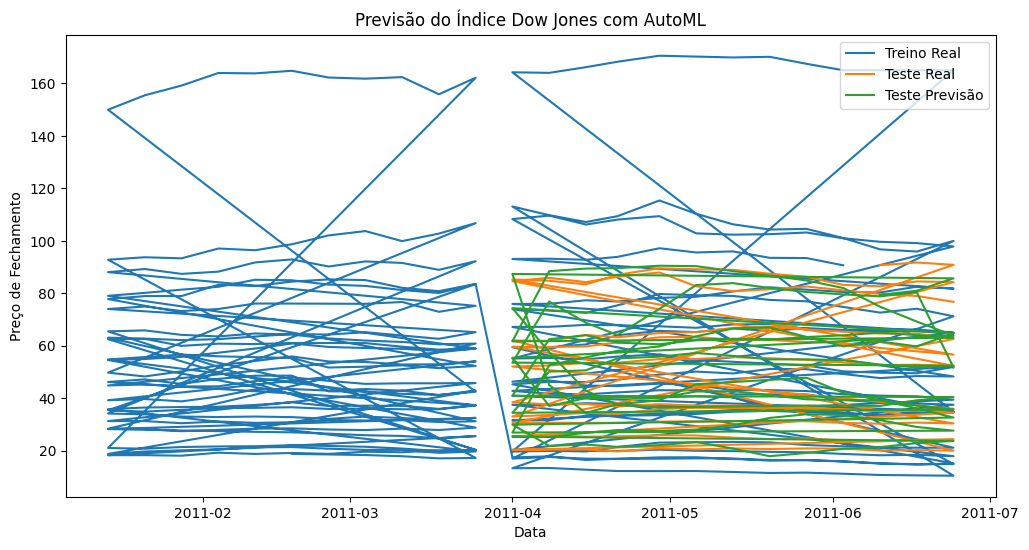

In [ ]:
# Visualizar os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data.index[time_step:train_size + time_step], y_train_actual, label='Treino Real')
plt.plot(data.index[train_size + time_step:], y_test_actual, label='Teste Real')
plt.plot(data.index[train_size + time_step:], test_predict, label='Teste Previsão')
plt.title('Previsão do Índice Dow Jones com AutoML')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Calcular métricas para o conjunto de treino
train_mse = mean_squared_error(y_train_actual, train_predict)
train_rmse = math.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_actual, train_predict)
train_r2 = r2_score(y_train_actual, train_predict)

# Calcular métricas para o conjunto de teste
test_mse = mean_squared_error(y_test_actual, test_predict)
test_rmse = math.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_actual, test_predict)
test_r2 = r2_score(y_test_actual, test_predict)

# Exibir as métricas
print("Métricas para o Conjunto de Treino:")
print(f"R²: {train_r2:.2f}")
print(f"MAE: {train_mae:.2f}")
print(f"MSE: {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")

print("\nMétricas para o Conjunto de Teste:")
print(f"R²: {test_r2:.2f}")
print(f"MAE: {test_mae:.2f}")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {test_rmse:.2f}")


Métricas para o Conjunto de Treino:
R²: 0.95
MAE: 4.04
MSE: 62.35
RMSE: 7.90

Métricas para o Conjunto de Teste:
R²: 0.78
MAE: 6.70
MSE: 115.22
RMSE: 10.73
